In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# Logistic regression in Python

this is pretty basic. Just call for sklearn (who you're gonna call), in combination with patsy (which is already more than is necessary)

In [2]:
file = r"C:\Users\Trost\Desktop\Temporär\AIWebScaleData\pollsdata.txt"

vote_df = pd.read_csv(file, delimiter = " ")




In [3]:
vote_df.head()

,org,year,survey,bush,state,edu,age,female,black,weight
11352,cbsnyt,7,9158,NaN,7,3,1,1,0,923
11353,cbsnyt,7,9158,1,39,4,2,1,0,558
11354,cbsnyt,7,9158,0,31,2,4,1,0,448
11355,cbsnyt,7,9158,0,7,3,1,1,0,923
11356,cbsnyt,7,9158,1,33,2,2,1,0,403


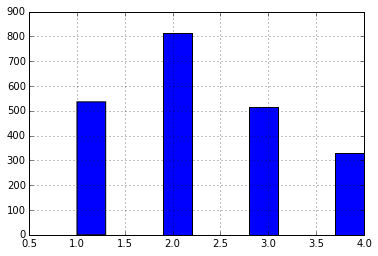

In [4]:
vote_df.age.hist()


Patsy is really cool for creating dummy variables. We could do this in pandas, too, but in patsy it's more fun (and also somewhat resembles R syntax, which is nice for reasons.)

In [5]:
y,X = dmatrices('bush ~ C(age)', vote_df, return_type = "dataframe")
X.head()

,Intercept,C(age)[T.2],C(age)[T.3],C(age)[T.4]
11353,1,1,0,0
11354,1,0,0,1
11355,1,0,0,0
11356,1,1,0,0
11357,1,0,0,1


In [6]:
y.head()


,bush
11353,1
11354,0
11355,0
11356,1
11357,1


In [7]:
y = np.ravel(y) # we need a np.array, otherwise LogisticRegression will throw an error.

### Sklearn
Scikit learn (sklearn) is the standard library to turn to when facing machine learning problems in python (at least for the first initial analysis; sklearn does not contain (many) state of the arts tools, which is somewhat intentional since sklearn wants to be super reliable; which often isn't possible with state of the arts stuff because it's not studied enough).

In [8]:
vote_model = LogisticRegression(fit_intercept=False) # Patsy creates intercept

vote_model.fit(X,y)
vote_model.score(X,y)

0.5578163771712159

### more variables

and also cross validation

In [9]:
y,X = dmatrices(
'bush ~ C(edu) + C(age)+ C(female) + C(black) + weight + C(state) ',
vote_df, return_type = "dataframe")
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3)


vote_model_2 = LogisticRegression(fit_intercept=False)
vote_model_2.fit(X_train,y_train)

vote_model_2.score(X_test,y_test)


0.59173553719008265